In [6]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

In [7]:
# Genrating random linear data 
# There will be 50 data points ranging from 0 to 50 
x = np.linspace(0, 50, 50) 
y = np.linspace(0, 50, 50) 
  
# Adding noise to the random linear data 
x += np.random.uniform(-4, 4, 50) 
y += np.random.uniform(-4, 4, 50) 
  
n = len(x) # Number of data points 


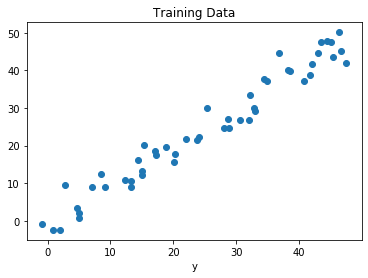

In [8]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 

In [11]:
#placeholder for X,Y values
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
# vairables for weights and bias of the network
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
#Hyperparameters
learning_rate = 0.01
training_epochs = 1000
#predicted y
y_pred = tf.add(tf.multiply(X, W), b) 
# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 
  
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 
  
# Global Variables Initializer 
init = tf.global_variables_initializer() 

W0812 11:28:42.039170 139931890140800 deprecation.py:323] From /home/me/Documents/BWA_dash/bwa_dash/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
    # Initializing the Variables 
    sess.run(init) 
    # Iterating through all the epochs 
    for epoch in range(training_epochs):    
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (_x, _y) in zip(x, y): 
            sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W) 
    bias = sess.run(b) 

Epoch 50 : cost = 5.6842217 W = 1.0680636 b = -1.3480767
Epoch 100 : cost = 5.686652 W = 1.0676899 b = -1.3309698
Epoch 150 : cost = 5.6889167 W = 1.0673537 b = -1.3155831
Epoch 200 : cost = 5.6910157 W = 1.0670515 b = -1.3017452
Epoch 250 : cost = 5.6929502 W = 1.0667796 b = -1.2893023
Epoch 300 : cost = 5.694736 W = 1.0665351 b = -1.2781085
Epoch 350 : cost = 5.69637 W = 1.0663154 b = -1.2680501
Epoch 400 : cost = 5.6978736 W = 1.0661178 b = -1.2589968
Epoch 450 : cost = 5.699239 W = 1.06594 b = -1.2508637
Epoch 500 : cost = 5.700488 W = 1.0657802 b = -1.2435429
Epoch 550 : cost = 5.701623 W = 1.0656364 b = -1.2369635
Epoch 600 : cost = 5.7026587 W = 1.0655072 b = -1.231045
Epoch 650 : cost = 5.7035937 W = 1.0653907 b = -1.22572
Epoch 700 : cost = 5.7044473 W = 1.0652863 b = -1.2209367
Epoch 750 : cost = 5.705218 W = 1.0651922 b = -1.2166305
Epoch 800 : cost = 5.7059164 W = 1.0651077 b = -1.2127616
Epoch 850 : cost = 5.706544 W = 1.0650318 b = -1.2092891
Epoch 900 : cost = 5.7071204 

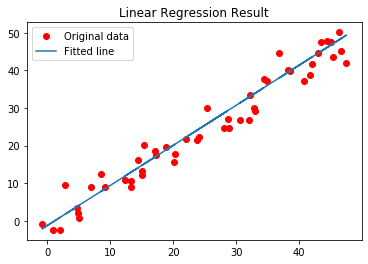

In [14]:
# Plotting the Results 
predictions = weight * x + bias 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 